In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import os
from csv import writer
import yaml
import matplotlib.pyplot as plt
from csv import reader
import numpy as np
import pylab
import seaborn as sns
sns.set(style="whitegrid")

/Users/geraintianpalmer/Documents/DetectingDeadlockInQingNetworkSimulation/venv/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [440]:
dirname = 'data_for_graphs/1Node/run_10000_itrs/vary_n1/'
stateth = '0'
state = '((0, 0),)'
begin = 0
end = 10
step = 1
var = 'n'
leg_loc = 'l'
line_colour = 'darkgreen'
plot_colour = 'darkorange'
filename = 'varyn.pdf'

In [441]:
Ls = [i*step + begin for i in range(int((end-begin)/step)+1)]
mean_times_to_deadlock = []
median_times_to_deadlock = []
simulation_results = []
root = os.getcwd()
directoryth = os.path.join(root, dirname)
directorys = os.path.join(root, dirname)

In [442]:
for i in Ls:
    if var[0] == 'n' or var[0] == 'c':
        parameter_file_name = directoryth + 'theoretical_results_%s.yml' % str(int(i))
    else:
        parameter_file_name = directoryth + 'theoretical_results_%s.yml' % str(i)
    parameter_file = open(parameter_file_name, 'r')
    parameters = yaml.load(parameter_file)
    parameter_file.close()
    mean_times_to_deadlock.append(parameters[stateth])

In [443]:
for i in Ls:
    if var[0] == 'n' or var[0] == 'c':
        parameter_file_name = directorys + 'deadlocking_times_%s.csv' % str(int(i))
    else:
        parameter_file_name = directorys + 'deadlocking_times_%s.csv' % str(i)
    parameter_file = open(parameter_file_name, 'r')
    rdr = reader(parameter_file)
    for row in rdr:
        if row[0] == state:
            simulation_results.append([float(obs) for obs in row[1:]])
            break
    parameter_file.close()

In [444]:
simulation_results_no_outliers = []
for data_series in simulation_results:
    q75, q25 = np.percentile(data_series, [75 ,25])
    iqr = q75 - q25
    upper = q75 + (1.5*iqr)
    lower = q25 - (1.5*iqr)
    new_data = [obs for obs in data_series if obs > lower and obs < upper]
    simulation_results_no_outliers.append(new_data)

In [445]:
if var[0] == 'c' or var[0] == 'n':
    Ls_show = [int(obs) for obs in Ls]
else:
    Ls_show = Ls

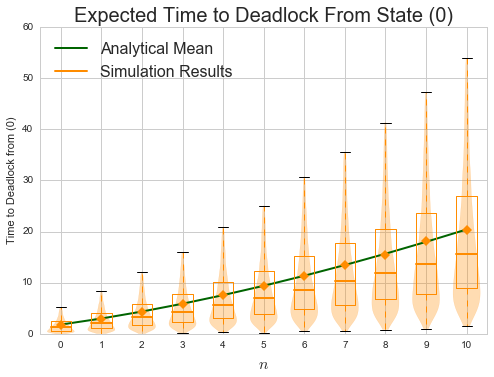

In [446]:
fig, ax = plt.subplots()
plt.plot(Ls_show, mean_times_to_deadlock, linewidth=2, label='Analytical Mean', color=line_colour)
plt.plot([], [], 'r', linewidth=2, label='Simulation Results', color=plot_colour)
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor=plot_colour)
bp = plt.boxplot(simulation_results, positions=Ls_show, widths=step/2, meanprops=meanpointprops, meanline=False, showmeans=True, sym='')
for median in bp['medians']:
    median.set(color=plot_colour, linewidth=2)
pylab.setp(bp['boxes'], color=plot_colour)
pylab.setp(bp['whiskers'], color=plot_colour)


vp = plt.violinplot(simulation_results_no_outliers, widths=step/1.5, positions=Ls, showmeans=False, showmedians=False, showextrema=False)
pylab.setp(vp['bodies'], color=plot_colour)

if var[0] == 'L':
    ax.set_xlabel(r'$\Lambda_{'+var[1:]+'}$', fontsize=16)
if var[0] == 'm':
    ax.set_xlabel(r'$\mu_{'+var[2:]+'}$', fontsize=16)
if var[0] == 'n':
    ax.set_xlabel(r'$n_{'+var[1:]+'}$', fontsize=16)
if var[0] == 'c':
    ax.set_xlabel(r'$c_{'+var[1:]+'}$', fontsize=16)
if var[0] == 'r':
    ax.set_xlabel(r'$r_{'+var[1:]+'}$', fontsize=16)

ax.set_ylabel('Time to Deadlock from (0)')
ax.set_title('Expected Time to Deadlock From State (0)', fontsize=20)

if var[0] == 'r':
    ax.set_xlim(0, 1.1)

if leg_loc == 'l':
    plt.legend(loc=2, prop={'size':16})
if leg_loc == 'r':
    plt.legend(loc=1, prop={'size':16})
plt.show()

fig.savefig(filename)